In our final notebook we'll just show how to implement our system of models in a x_test, y_test dataset. In our case, we will suppose that x_test is list (or array ) of arrays (images) of 3 dimensions. Each one of the images has random dimensions of height and width but is mandatorily three channeled.

So let's show how it's done

FIrstly let's import all the necessary modules 

In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage import io
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.merge import concatenate
from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
import keras.layers as l
import keras.models as m
import tensorflow  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from keras.layers import Activation
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from xml.etree import ElementTree
from tensorflow.keras.models import load_model
import imageio
from keras_preprocessing.image import ImageDataGenerator
import random
from tqdm import tqdm
import operator
import imageio

In [2]:
#Since the models are saved in h5 format and we have used a custom function in some of them (Lecun_), we should firstly 
#define it and then call it as a custom_object

def Lecun_(x):
    tan_h=K.tanh(x) #hyperbolic tan function
    t=1.7159*(tan_h)+0.01*x #lecun function
    return t

Now let's load our models and save them in a list called members

In [3]:
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'models_new/model_' + str(i + 1) +'.h5' 
        # load model from file
        model = load_model(filename,custom_objects={"Lecun_": Lecun_ })
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

# load all models
n_members = 9
members = load_all_models(n_members)

>loaded models_new/model_1.h5
>loaded models_new/model_2.h5
>loaded models_new/model_3.h5
>loaded models_new/model_4.h5
>loaded models_new/model_5.h5
>loaded models_new/model_6.h5
>loaded models_new/model_7.h5
>loaded models_new/model_8.h5
>loaded models_new/model_9.h5


So let's create our function for predictions. It will have as input our x_test and y_test dataset, as well as the list of our models exploited for predictions

In [4]:
def prediction(XX_test,Y_test,models): #models is the list of the models that will be exploited for the prediciton 
    X_test=XX_test.copy()
    sum_acc=0
    for imag in range (len(X_test)):
        if X_test[imag].shape[-1]!=3: #We want always channels last
            X_test[imag]=X_test[imag].transpose(2, 0, 1)
        X_test[imag]=cv2.resize(X_test[imag], dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
        X_test[imag] = X_test[imag].astype('float32')
        X_test[imag]/=255
        X_test[imag]=X_test[imag].reshape(1,60,60,3)
        Dict_1 = {'0': 0 , '1': 0 , '2': 0}
        Dict_2 = {'0': 0 , '1': 0 , '2': 0}
        for i in range (len(models)):
            list_pred=models[i].predict(X_test[imag])
            prediction=np.argmax(list_pred)
            Dict_1[str(prediction)]+=1
            Dict_2['0']+=list_pred[0][0]
            Dict_2['1']+=list_pred[0][1]
            Dict_2['2']+=list_pred[0][2]
    
        itemMaxValue = max(Dict_1.items(), key=lambda x: x[1])
        listOfKeys = list() 
        for key, value in Dict_1.items():
            if value == itemMaxValue[1]:
                listOfKeys.append(key)
            
        if len(listOfKeys)==1: # unique max vlaue of the predictions
            final_pred= int(max(Dict_1, key = Dict_1.get) )
        else:                 #not unique max value of the predictions
            final_pred=  int(max(Dict_2, key = Dict_2.get) )
        if final_pred==Y_test[imag]:
            sum_acc+=1
            
    accuracy=sum_acc/len(X_test)
    print('\n')
    
    print ('The accuracy of the dataset is :', accuracy)
        
    

Let's create a toy dataset (x_test and y_test) and play a little with it and demonstrate how our function works

In [5]:
x_test=[]
x_test.append(io.imread('photos_example/0.png'))
x_test.append(io.imread('photos_example/1.png'))
x_test.append(io.imread('photos_example/2.png'))
x_test.append(io.imread('photos_example/22.png'))
x_test.append(io.imread('photos_example/00.png'))
y_test=[]
y_test.append(0)
y_test.append(1)
y_test.append(2)
y_test.append(2)
y_test.append(0)

The original shape of no:  1  image of the dataset is:  (1600, 1200, 3)


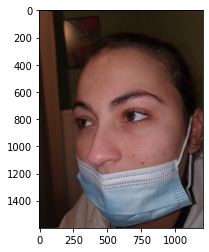

The ground truth of no:  1  image of the dataset is:  0


The original shape of no:  2  image of the dataset is:  (1472, 1104, 3)


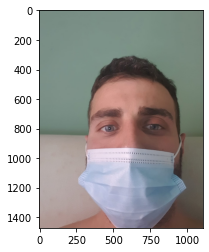

The ground truth of no:  2  image of the dataset is:  1


The original shape of no:  3  image of the dataset is:  (1472, 1104, 3)


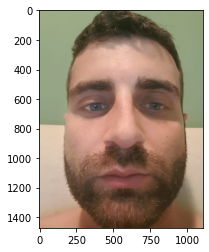

The ground truth of no:  3  image of the dataset is:  2


The original shape of no:  4  image of the dataset is:  (1600, 1200, 3)


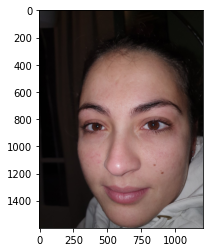

The ground truth of no:  4  image of the dataset is:  2


The original shape of no:  5  image of the dataset is:  (2525, 1636, 3)


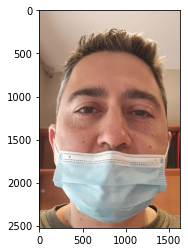

The ground truth of no:  5  image of the dataset is:  0




In [6]:
for i in range (len(x_test)):
    print ('The original shape of no: ', i +1 , ' image of the dataset is: ',x_test[i].shape)
    plt.imshow(x_test[i])
    plt.show()
    print ('The ground truth of no: ', i +1, ' image of the dataset is: ',y_test[i])
    print ('\n')

Let's exploit our function prediction now

In [8]:
prediction(x_test,y_test,members)



The accuracy of the dataset is : 1.0


Our system of models achieved 100 % accuracy in 5 random pictures taken by our team, which were stored in a x_test, y_test dataset